In [1]:
import pandas as pd

import sqlite3
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import nbimporter
import Building_models_function_to_import


%matplotlib inline



Importing Jupyter notebook from Building_models_function_to_import.ipynb


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


***

# Cross Validation taking one season-league at a time as the test data

##  'stanford_real_features'

First for the 'stanford_real_features' type of data that is the name of how we have saved the data builded before for different seasons-leagues of 'df_matches'.


>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.71
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_15_16.csv): 0.53

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.45

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix



>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.70
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_14_15.csv): 0.52

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


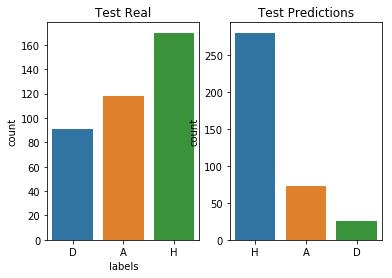

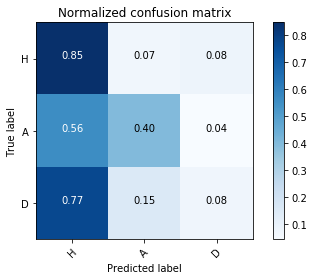


>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.71
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_13_14.csv): 0.54

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.48

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


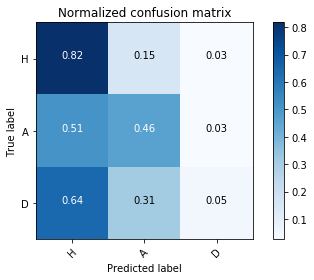


>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.71
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_12_13.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.49

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


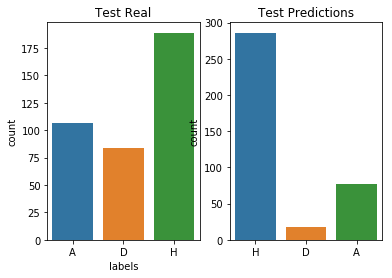


>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.72
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_11_12.csv): 0.55

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.47

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix



>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.72
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_10_11.csv): 0.59

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.52

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


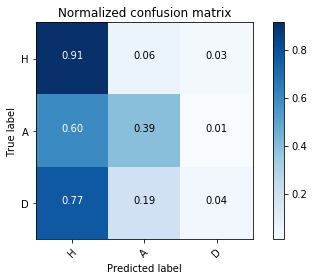


>>>  CLASSIFIER: sclf

---------------------
*** ACCURACY ***
---------------------
Accuracy of sclf classifier on training set: 0.71
Accuracy of sclf classifier on test set (df_stanford_fifa_features_AfterFE_leagues_21518_seasons_09_10.csv): 0.56

---------------------
*** F1 SCORE ***
---------------------
F1 Score of sclf classifier on test set: 0.48

---------------------
*** CONFUSION MATRIX ***
---------------------
Normalized confusion matrix


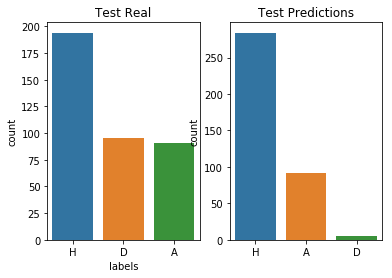

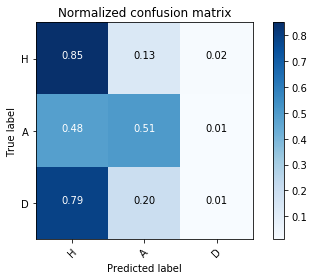

.......................
.......................

Avg Accuracy on training set: 0.7092018275169323
Avg Accuracy on testing set: 0.5492209897917438
Feature importance:
Normalized confusion matrix


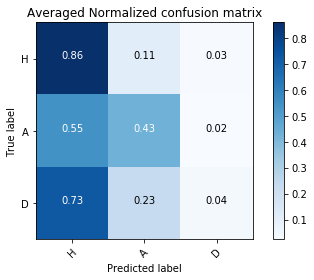

avg_train_acc  avg_test_acc  avg_f1_scores
0       0.709202      0.549221       0.481115

   accuracies_train  accuracies_test  \
0          0.706919         0.534211   
1          0.696035         0.522427   
2          0.705134         0.540541   
3          0.708242         0.552632   
4          0.716615         0.547368   
5          0.721463         0.589474   
6          0.710004         0.557895   

                                     test_data_names  f1_scores  
0  df_stanford_fifa_features_AfterFE_leagues_2151...   0.453057  
1  df_stanford_fifa_features_AfterFE_leagues_2151...   0.469030  
2  df_stanford_fifa_features_AfterFE_leagues_2151...   0.484014  
3  df_stanford_fifa_features_AfterFE_leagues_2151...   0.492135  
4  df_stanford_fifa_features_AfterFE_leagues_2151...   0.472541  
5  df_stanford_fifa_features_AfterFE_leagues_2151...   0.518519  
6  df_stanford_fifa_features_AfterFE_leagues_2151...   0.478508  


avg_train_acc avg_test_acc avg_f1_scores                         dataset
sclf      0.709202     0.549221      0.481115  stanford_fifa_features_AfterFE

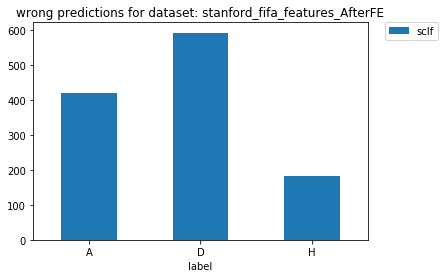

In [6]:
seasons = ['2015/2016','2014/2015','2013/2014','2012/2013','2011/2012','2010/2011','2009/2010']
leagues_id = [21518]

datasets = ['stanford_real_features','stanford_real_features_AfterFE','stanford_fifa_features','stanford_fifa_features_AfterFE','merge_df_stanford_fifa_features_df_stanford_real_features','stanford_fifa_features_SMOTETomek','stanford_real_features_SMOTETomek','stanford_fifa_features_AfterFE_SMOTETomek','stanford_real_features_AfterFE_SMOTETomek','merge_df_stanford_fifa_features_df_stanford_real_features']
datasets = ['merge_df_stanford_fifa_features_AfterFE_SMOTETomek_df_stanford_real_features_AfterFE']
datasets = ['merge_df_stanford_fifa_features_df_stanford_real_features','stanford_fifa_features_AfterFE_SMOTETomek','stanford_fifa_features_AfterFE','stanford_real_features_AfterFE_SMOTETomek','stanford_real_features_AfterFE']
datasets = ['stanford_real_features','stanford_real_features_AfterFE','stanford_real_features_AfterFE_SMOTETomek']
datasets = ['stanford_fifa_features_AfterFE']

res_total2 = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])


for dataset in datasets:

    
    clf1 = LogisticRegression(C=5, penalty ='l2',random_state =100)
    clf2 = XGBClassifier(learning_rate = 0.2, max_depth= 10, reg_lambda= 1000, random_state = 100)
    clf3 = RandomForestClassifier(max_depth = 12,min_samples_leaf = 7, n_estimators=100, n_jobs= -1, random_state = 100)




    from sklearn.ensemble import VotingClassifier
    sclf = VotingClassifier(estimators=[
        ('lr', clf1), ('xgb', clf2), ('svc', clf3)],
                             voting='soft')



    cv=3
    n_jobs=6
    verbose=1
    scoring=None
    refit=False


    from sklearn.metrics import log_loss
    from sklearn.model_selection import ParameterGrid

    res_all = pd.DataFrame(columns= ['avg_train_acc','avg_test_acc','avg_f1_scores','dataset'])
    df_w_p_d_total = pd.DataFrame(index= ['A','D','H'])

    


    import warnings
    with warnings.catch_warnings():
    # ignore all caught warnings
        warnings.filterwarnings("ignore")
        results_lr, avg_results_lr, avg_conf_matrix_lr, df_fi_lr, df_wrong_predictions_distribution = Building_models_function_to_import.cross_val_evaluation2(dataset,leagues_id, seasons, classifier=sclf,classifier_name= 'sclf', location_to_file = 'data/',onehot=[False], labelling= [False],feature_importance=False, wrong_predictions = True)
        res_all.loc[f'sclf',:] = avg_results_lr.loc[0,['avg_train_acc','avg_test_acc','avg_f1_scores']]
        res_all.loc[f'sclf','dataset'] = dataset
        print(results_lr)

        if df_wrong_predictions_distribution.empty == False:
            df_wrong_predictions_distribution = df_wrong_predictions_distribution.rename(index=str, columns={sclf: f'sclf'})
            df_w_p_d_total = pd.concat([df_w_p_d_total, df_wrong_predictions_distribution], axis=1)
#                     display(df_w_p_d_total)  
            df_w_p_d_total.plot.bar(title=f'wrong predictions for dataset: {dataset}', rot=0)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


                
    res_all = res_all.sort_values(['avg_f1_scores','avg_test_acc'], ascending=False)
    display(res_all)
    res_total2 = pd.concat([res_total2, res_all])
    


In [ ]:
res_total2